In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import roc_curve, precision_recall_curve, auc

file_paths = {
    "Generalized Additive Models": "../40_results/gam_prob.csv",
    "Decision Tree": "../40_results/decision_tree_prob.csv",
    "XGBoost": "../40_results/xgboost_prob.csv",
    "Logistic Regression": "../40_results/logistic_prob.csv",
    "Naive Bayes": "../40_results/naive_prob.csv",
}

dfs_pred = {
    model_name: pd.read_csv(file_path)["score"]
    for model_name, file_path in file_paths.items()
}
df_true = pd.read_csv("../40_results/y_test.csv")["score"]


random_guess_proba = np.random.rand(len(df_true))

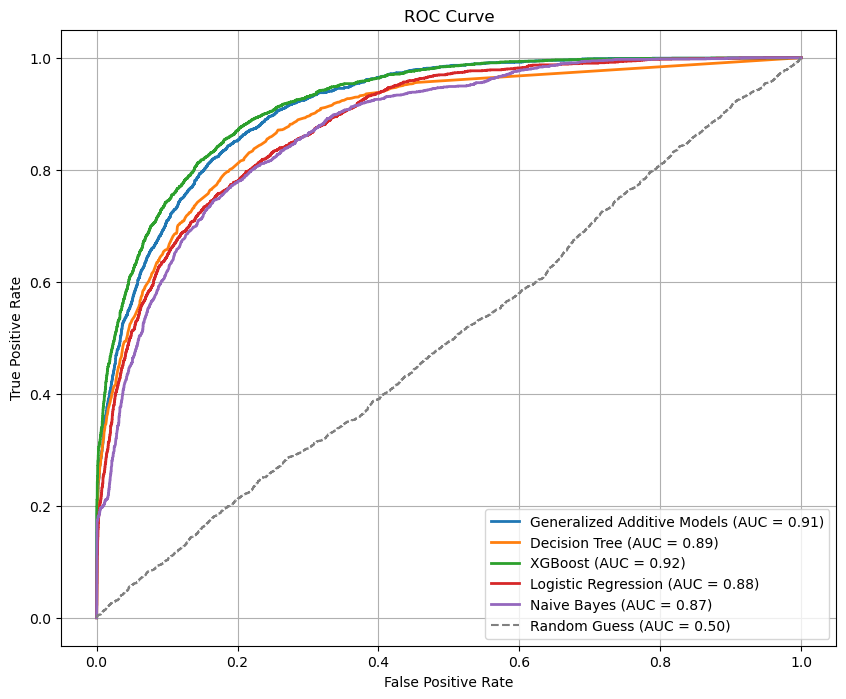

In [2]:
# AUC curve
fig_roc = plt.figure(figsize=(10, 8))
for model_name, y_pred_proba in dfs_pred.items():
    fpr, tpr, _ = roc_curve(df_true, y_pred_proba)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=2, label=f"{model_name} (AUC = {roc_auc:.2f})")

fpr_random, tpr_random, _ = roc_curve(df_true, random_guess_proba)
roc_auc_random = auc(fpr_random, tpr_random)
plt.plot(
    fpr_random,
    tpr_random,
    linestyle="--",
    color="gray",
    label=f"Random Guess (AUC = {roc_auc_random:.2f})",
)

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

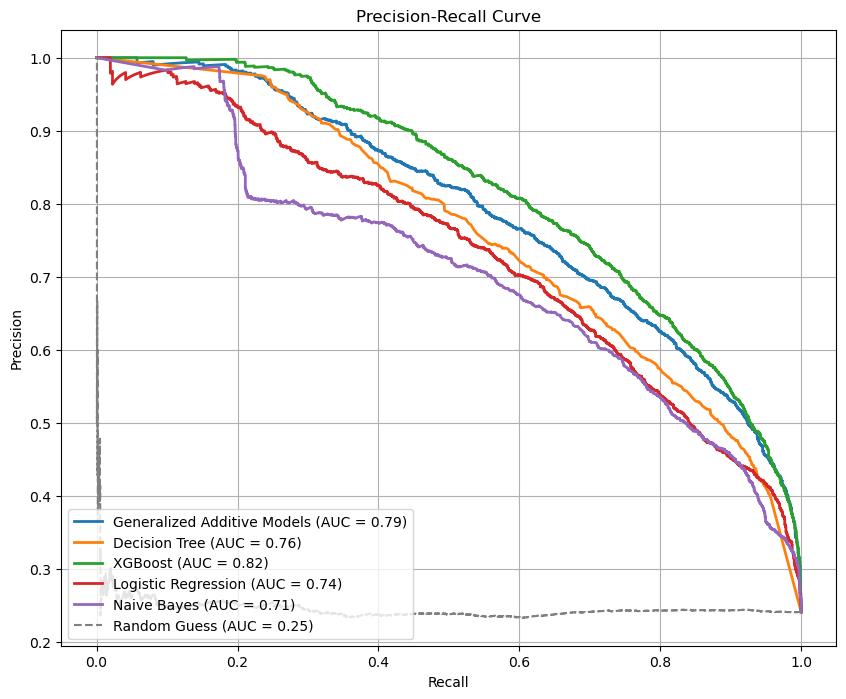

In [4]:
# PR curve
fig_pr = plt.figure(figsize=(10, 8))
for model_name, y_pred_proba in dfs_pred.items():
    precision, recall, _ = precision_recall_curve(df_true, y_pred_proba)
    pr_auc = auc(recall, precision)
    plt.plot(recall, precision, lw=2, label=f"{model_name} (AUC = {pr_auc:.2f})")

precision_random, recall_random, _ = precision_recall_curve(df_true, random_guess_proba)
pr_auc_random = auc(recall_random, precision_random)
plt.plot(
    recall_random,
    precision_random,
    linestyle="--",
    color="gray",
    label=f"Random Guess (AUC = {pr_auc_random:.2f})",
)

plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.legend(loc="lower left")
plt.grid(True)
plt.show()